In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pandas_datareader import data as pdr
import yfinance as yf


In [28]:
yf.pdr_override()

data = pdr.get_data_yahoo("AAPL", start="2010-01-01", end="2019-12-31")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.452589,352410800
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.553026,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.564355,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.459940,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.447998,477131200


In [29]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.960785,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,70.027306,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,71.416672,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,71.389572,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.813286,144114400


In [30]:
data =data.reset_index()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,7.611786,7.619643,7.520000,7.526071,6.452589,352410800
1,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.553026,493729600
2,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.564355,601904800
3,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.459940,552160000
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.447998,477131200


In [31]:
data = data.drop(['Date','Adj Close'],axis =1)
data.head()

,Open,High,Low,Close,Volume
0,7.611786,7.619643,7.520000,7.526071,352410800
1,7.622500,7.660714,7.585000,7.643214,493729600
2,7.664286,7.699643,7.616071,7.656429,601904800
3,7.656429,7.686786,7.526786,7.534643,552160000
4,7.562500,7.571429,7.466071,7.520714,477131200


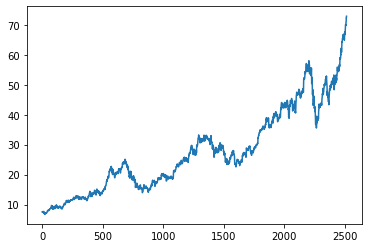

In [33]:
plt.plot(data.Close)

In [34]:
data

,Open,High,Low,Close,Volume
0,7.611786,7.619643,7.520000,7.526071,352410800
1,7.622500,7.660714,7.585000,7.643214,493729600
2,7.664286,7.699643,7.616071,7.656429,601904800
3,7.656429,7.686786,7.526786,7.534643,552160000
4,7.562500,7.571429,7.466071,7.520714,477131200
...,...,...,...,...,...
2511,70.132500,71.062500,70.092499,71.000000,98572000
2512,71.172501,71.222504,70.730003,71.067497,48478800
2513,71.205002,72.495003,71.175003,72.477501,93121200
2514,72.779999,73.492500,72.029999,72.449997,146266000


In [36]:
ma100 = data.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    59.201075
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
Name: Close, Length: 2516, dtype: float64

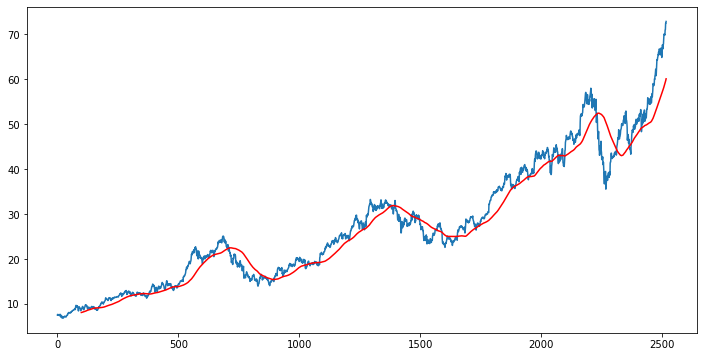

In [38]:
plt.figure(figsize =(12,6))
plt.plot(data.Close)
plt.plot(ma100,'r')

In [39]:
ma200 = data.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    54.132313
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
Name: Close, Length: 2516, dtype: float64

In [ ]:
plt.figure(figsize =(12,6))
plt.plot(data.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [41]:
data.shape

(2516, 5)

In [43]:
#Splitting data into training ans testing

data_training = pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_testing = pd.DataFrame(data['Close'][int(len(data)*0.70):int(len(data))])

print (data_training.shape)
print (data_testing.shape)

(1761, 1)
(755, 1)


In [44]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [45]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [49]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [62]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append (data_training_array[i-100:i])
    y_train.append (data_training_array[i,0])
    
    
    X_train, Y_train = np.array(x_train), np.array(y_train)


In [ ]:
#ML Model

In [110]:
from keras.layers import Dense,Dropout ,LSTM
from keras.models import Sequential

In [111]:
model = Sequential()
model.add(LSTM(units =50 ,activation = 'relu' , return_sequences = True , input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model = Sequential()
model.add(LSTM(units =60 ,activation = 'relu' , return_sequences = True ))
model.add(Dropout(0.3))

model = Sequential()
model.add(LSTM(units =80 ,activation = 'relu' , return_sequences = True ))
model.add(Dropout(0.4))

model = Sequential()
model.add(LSTM(units =120 ,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))



In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
52/52 [==============================] - 6s 76ms/step - loss: 0.0809
Epoch 2/100
52/52 [==============================] - 4s 75ms/step - loss: 0.0138
Epoch 3/100
34/52 [==================>...........] - ETA: 1s - loss: 0.0121

In [81]:
model.save('keras_model.h5')


In [109]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 120)               58560     
                                                                 
 dropout_19 (Dropout)        (None, 120)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 121       
                                                                 
Total params: 58,681
Trainable params: 58,681
Non-trainable params: 0
_________________________________________________________________


In [83]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [84]:
past_100_days = data_training.tail(100)

In [85]:
final_data= past_100_days.append(data_testing,ignore_index=True)

In [86]:
final_data.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [87]:
input_data =scaler.fit_transform(final_data)

In [88]:
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [89]:
input_data.shape

(855, 1)

In [93]:
x_test =[]
y_test =[]

for i in range (100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [94]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [95]:
#Making predictions

y_predicted = model.predict(x_test)


In [96]:
y_predicted.shape


(755, 1)

In [97]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [98]:
y_predicted

array([[0.07838768],
       [0.07944185],
       [0.07957706],
       [0.07994157],
       [0.08007735],
       [0.08063868],
       [0.08213797],
       [0.08428934],
       [0.08627957],
       [0.08858857],
       [0.09022045],
       [0.09152234],
       [0.09341314],
       [0.09501293],
       [0.09623161],
       [0.09743753],
       [0.09849903],
       [0.0992898 ],
       [0.10144809],
       [0.10332906],
       [0.10500792],
       [0.10621795],
       [0.10702458],
       [0.11348531],
       [0.11888734],
       [0.12426355],
       [0.12997547],
       [0.13592336],
       [0.14148828],
       [0.14659223],
       [0.1507307 ],
       [0.15508977],
       [0.16002378],
       [0.16457519],
       [0.16834581],
       [0.171798  ],
       [0.17539038],
       [0.17869821],
       [0.18105689],
       [0.18308882],
       [0.18491255],
       [0.18641761],
       [0.18965167],
       [0.19182585],
       [0.19431964],
       [0.19613819],
       [0.19780655],
       [0.198

In [99]:
scaler.scale_

array([0.02123255])

In [100]:
scale_factor =1/0.02123255
y_predicted = y_predicted *scale_factor
y_test = y_test *scale_factor


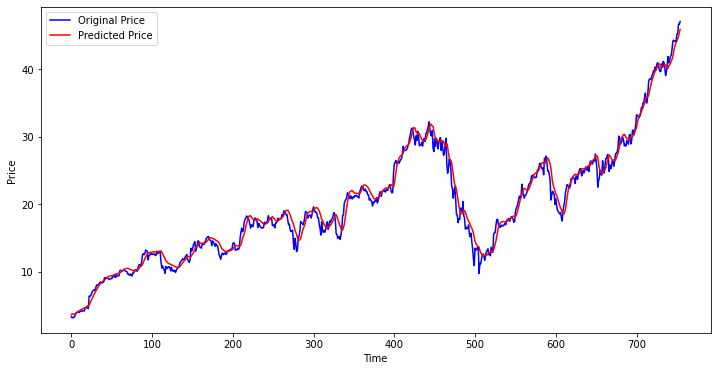

In [102]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label ='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()